# Kaggle - Allstate Claim Severity - [LINK](https://www.kaggle.com/competitions/allstate-claims-severity/data) 

### EDA

In [33]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly
import statsmodels as sm
import xgboost as xgb

import os

In [34]:
PATH = os.getcwd()
test_df = pd.read_csv(
    filepath_or_buffer= os.path.join(PATH, 'train.csv'),
    on_bad_lines= 'skip' # issue on line 188320
)
print(test_df.head(5))
print(test_df.shape)

     id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1.0    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2.0    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5.0    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10.0    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11.0    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]
(188319, 

### **OTHER**
- Here I am going to define some constants so its easier for me to work with later

In [49]:
COL_CAT = [str('cat' + str(i)) for i in range(1, 117, 1)]
COL_CONT = [str('cont' + str(i)) for i in range(1, 15, 1)]
Y = 'loss'

### Basic Data Cleaning
- Outliers
- Missing values
- Duplicate data
- Data Quality Measures
    - Accuracy
    - Completeness
    - Timeliness
    - Believability
    - Interoperability

#### (A) Missing Data

0         False
1         False
2         False
3         False
4         False
          ...  
188314    False
188315    False
188316    False
188317    False
188318     True
Name: loss, Length: 188319, dtype: bool

#### (?) Outliers

- I don't think its possible to check for *outliers* in categorical data. So I'm only looking at continuous

### Creating Some Graphs

- Boxplot
- Histogram
- Quantile Plot
- Scatter Plot (correlation)

mean, median, mode

#### Continuous Columns Correlation Matrix

In [35]:
test_df[['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14','loss']].corr()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808,0.020236


<Axes: >

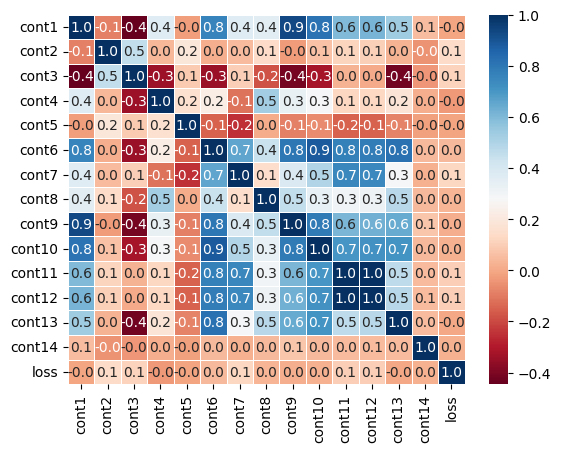

In [36]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
sns.heatmap(
    data= test_df[['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14','loss']].corr(),
    annot= True,
    cmap= 'RdBu', # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    fmt= '.1f',
    linewidth= .5,
    # vmin= -1,
    # vmax= 1
)

In [37]:
def continuous_boxplot(df: pd.DataFrame, X: list[str], Y: str) -> None:
    pass


continuous_boxplot(
    df= test_df,
    X= ['cont1','cont2','cont3',
        'cont4','cont5','cont6',
        'cont7','cont8','cont9',
        'cont10','cont11','cont12',
        'cont13','cont14'],
    y= 'loss'
)

TypeError: continuous_boxplot() got an unexpected keyword argument 'y'

In [ ]:
def continuous_histogram(df: pd.DataFrame, X: list[str], Y: str) -> None:
    pass


continuous_histogram(
    df= test_df,
    X= ['cont1','cont2','cont3',
        'cont4','cont5','cont6',
        'cont7','cont8','cont9',
        'cont10','cont11','cont12',
        'cont13','cont14'],
    y= 'loss'
)

In [ ]:
def continuous_quantile(df: pd.DataFrame, X: list[str], Y: str) -> None:
    pass


continuous_quantile(
    df= test_df,
    X= ['cont1','cont2','cont3',
        'cont4','cont5','cont6',
        'cont7','cont8','cont9',
        'cont10','cont11','cont12',
        'cont13','cont14'],
    y= 'loss'
)

In [ ]:
def continuous_scatter(df: pd.DataFrame, X: list[str], Y: str) -> None:
    pass


continuous_scatter(
    df= test_df,
    X= ['cont1','cont2','cont3',
        'cont4','cont5','cont6',
        'cont7','cont8','cont9',
        'cont10','cont11','cont12',
        'cont13','cont14'],
    y= 'loss'
)

In [ ]:
def continuous_boxplot(df: pd.DataFrame, X: list[str], Y: str) -> None:
    pass


continuous_boxplot(
    df= test_df,
    X= ['cont1','cont2','cont3',
        'cont4','cont5','cont6',
        'cont7','cont8','cont9',
        'cont10','cont11','cont12',
        'cont13','cont14'],
    y= 'loss'
)